<a href="https://colab.research.google.com/github/raistra/F-Case-Study-04-Data-Mining/blob/main/Case_Study_04_Kelompok_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong>Study Case 04 - Data Mining dan Business Intelligence: Korelasi dan Regresi</strong></h2></center>


---




# **Kelompok F**

Anggota :
 
1. Andini Assyahidah (2006571040)
2. Farah Tri Nurul Hayati (2006572882)
3. Ni Made Lidya Anggreni (2006522700)
4. Nurul Qomariah Abdillah (2006463811)
5. Peksyaji (2006522322)
6. Raistra Aurel (2006572876)
7. Yovela Natalia Yvone (2006463894)


# **Problem Statement**

Menilai nilai peningkatan efisiensi energi dapat menjadi tantangan karena tidak ada cara untuk benar-benar mengetahui berapa banyak energi yang akan digunakan bangunan tanpa perbaikan. Yang terbaik yang bisa kita lakukan adalah membangun model kontrafaktual. Setelah bangunan dirombak, konsumsi energi baru (lebih rendah) dibandingkan dengan nilai model bangunan asli untuk menghitung penghematan dari retrofit. Model yang lebih akurat dapat mendukung insentif pasar yang lebih baik dan memungkinkan pembiayaan dengan biaya lebih rendah.

Tujuan dari Study Case ini untuk membangun model kontrafaktual di empat jenis energi berdasarkan tingkat penggunaan historis dan cuaca yang diamati. Kumpulan data mencakup pembacaan meter per jam selama tiga tahun dari lebih dari seribu bangunan di beberapa lokasi berbeda di seluruh dunia.

# **Import Module**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
plt.style.use('bmh'); sns.set()
"Done"

'Done'

# **Data**

In [ ]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2022-11-18 09:09:14--  https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.03s   

2022-11-18 09:09:14 (8.69 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
#Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# **Pre Processing**

In [ ]:
#Drop duplicates
df.shape #(lihat shape)
df.drop_duplicates()
df.shape #recheck shape

(1413, 12)

In [ ]:
#Missing Values for every colomn
df.isnull().sum()

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64

In [ ]:
# Mengubah tipe data
df['primary_use'] = df['primary_use'].astype('category')

Note:
* Terdapat tipe data yang perlu diperbaiki, yaitu primary_use.
* primary_use yang awalnya bertipe data object seharusnya bertipe data category.

In [ ]:
#Handling missing values: drop row 
df3 = df.drop(columns=['year_built','floor_count'])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1413 non-null   float64 
 1   primary_use         1413 non-null   category
 2   square_feet         1413 non-null   int64   
 3   air_temperature     1413 non-null   float64 
 4   cloud_coverage      1396 non-null   float64 
 5   dew_temperature     1413 non-null   float64 
 6   precip_depth_1_hr   1237 non-null   float64 
 7   sea_level_pressure  1324 non-null   float64 
 8   wind_direction      1413 non-null   float64 
 9   wind_speed          1413 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 101.5 KB


Note:
Pada df3, kami menghapus variabel 'year_built' dan 'floor_count' karena jumlah missing values pada kedua kolom yang ada cukup banyak variabel tersebut kami anggap tidak relevan dengan tujuan analisis kami

In [ ]:
df3.isnull().sum()

meter_reading           0
primary_use             0
square_feet             0
air_temperature         0
cloud_coverage         17
dew_temperature         0
precip_depth_1_hr     176
sea_level_pressure     89
wind_direction          0
wind_speed              0
dtype: int64

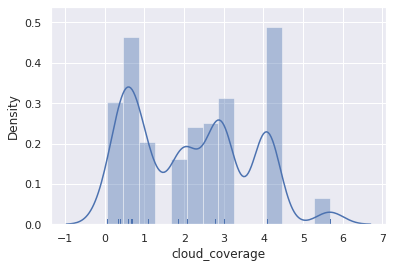

In [ ]:
sns.distplot(df3['cloud_coverage'], kde=True, rug=True)

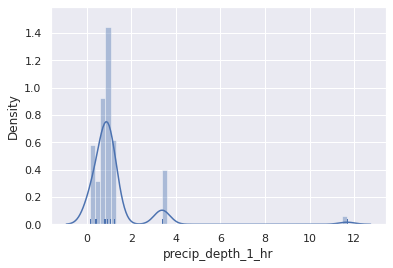

In [ ]:
sns.distplot(df3['precip_depth_1_hr'], kde=True, rug=True)

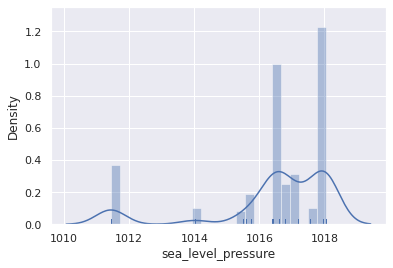

In [ ]:
sns.distplot(df3['sea_level_pressure'], kde=True, rug=True)

In [ ]:
df3['cloud_coverage'] = df3['cloud_coverage'].fillna(df3['cloud_coverage'].mean())
df3['precip_depth_1_hr'] = df3['precip_depth_1_hr'].fillna(df3['precip_depth_1_hr'].median())
df3['sea_level_pressure'] = df3['sea_level_pressure'].fillna(df3['sea_level_pressure'].median())

Note:
* Pada variabel cloud_coverage terdapat data yang missing. Hal ini terlihat ketika kami melakukan pengecekan terhadap missing values di python menggunakan syntax df3.isnull().sum(). Selanjutnya, karena setelah melakukan plot distribusi pada variabel terlihat bahwa kurang terlihat kecenderungan condong kanan maupun kiri, sehingga kami mengisi missing values dengan mean-nya.
* Pada variabel precip_depth_1_hr, kami melakukan plot distribusi dengan modul sns. Terlihat bahwa distribusi data condong kanan, sehingga kami mengisi missing values dengan nilai median.
* Pada variabel sea_level_pressure, kami melakukan plot distribusi dengan modul sns. Terlihat bahwa distribusi data condong kiri, sehingga kami mengisi missing values dengan nilai median.

In [ ]:
df4 = df3

In [ ]:
df4.isnull().sum()

meter_reading         0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

Berdasarkan output tersebut, diperoleh bahwa data sudah bersih dari missing values

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1413 non-null   float64 
 1   primary_use         1413 non-null   category
 2   square_feet         1413 non-null   int64   
 3   air_temperature     1413 non-null   float64 
 4   cloud_coverage      1413 non-null   float64 
 5   dew_temperature     1413 non-null   float64 
 6   precip_depth_1_hr   1413 non-null   float64 
 7   sea_level_pressure  1413 non-null   float64 
 8   wind_direction      1413 non-null   float64 
 9   wind_speed          1413 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 101.5 KB


Note :

- Tipe data sudah sesuai dengan yang seharusnya.

# **EDA**

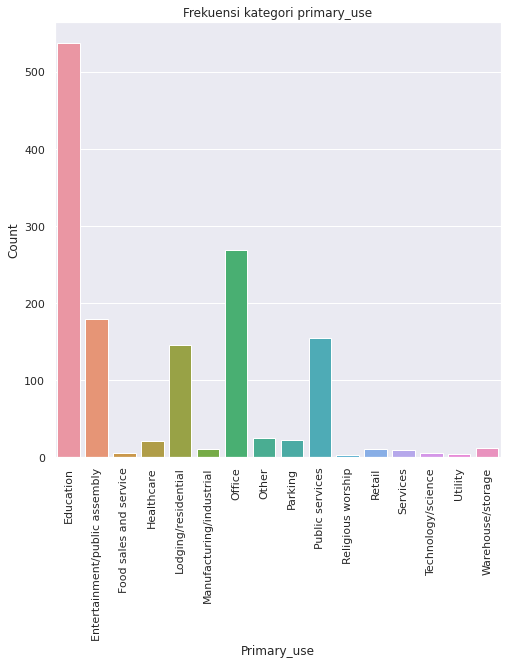

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'primary_use', data = df4).set_title("Frekuensi kategori primary_use", fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Primary_use')
plt.ylabel('Count')
plt.show()

Dari grafik di atas, terlihat bahwa record yang disimpan paling banyak adalah 
gedung yang digunakan sebagai tempat Education, yaitu sebanyak 537 bangunan. Kemudian empat bangunan lain yang record-nya tinggi adalah Office, Entertaiment/publict assembly, Public services, dan Lodging/residential.

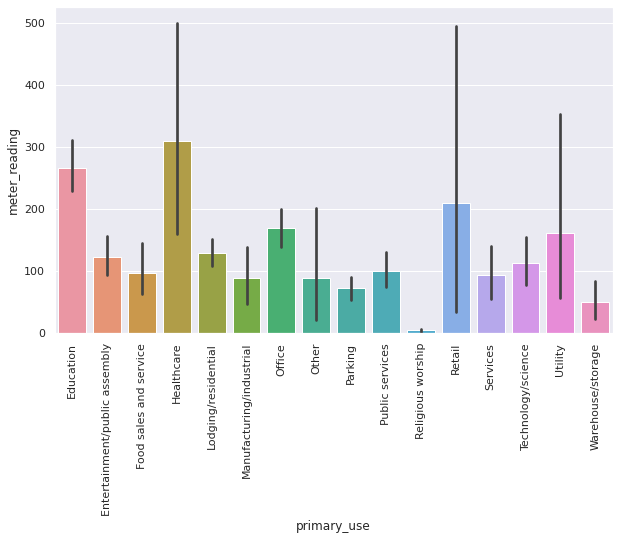

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='primary_use',y='meter_reading',data=df4)
plt.xticks(rotation='vertical')
plt.show()

Dilihat dari grafik di atas, Healtcare, Retail, dan Education menjadi penggunaan listrik terbanyak. Terlihat pula untuk Healtcare, Retail, Utility, dan Other memiliki outier yang jaraknya jauh dari rata-ratanya.

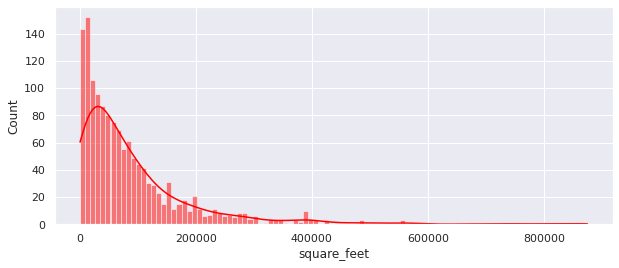

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df4['square_feet'],kde=True,color='red',bins=100)

Terlihat dari grafik di atas bahwa banyaknya bangunan yang terrecord menurun sejalan dengan kenaikan luas bangunan.

Mayoritas bangunan berdiri dengan luas bangunan di bawah 200000 kaki persegi

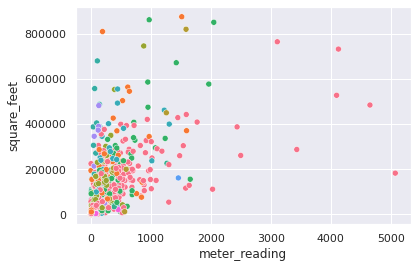

In [ ]:
p = sns.scatterplot(data=df4, x='meter_reading', y='square_feet', hue='primary_use', legend=False)

1. Terlihat bahwa bangunan cenderung memiliki luas bangunan di bawah 200000 kaki persegi dan memiliki penggunaan listrik sebesar 0-1000 kWh.
2. Terdapat bangunan dengan luas bangunan yang cenderung kecil tetapi mengonsumsi listrik dengan sangat tinggi.
3. Terdapat bangunan dengan luas bangunna yang tinggi, tetapi mengonsumsi daya yang cenderung rendah.

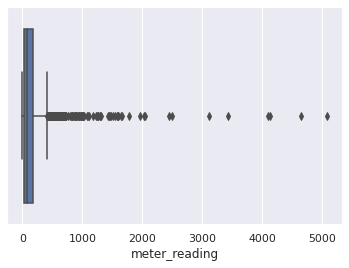

In [ ]:
p = sns.boxplot(df4['meter_reading'])

In [ ]:
df4.describe(include='all')

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,15.697154,2.166618,8.259831,1.151504,1016.487808,175.351051,3.564617
std,374.899500,NaN,111412.340117,5.416736,1.452818,4.625295,1.386802,1.862148,24.921236,0.737746
min,0.000400,NaN,283.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,NaN,115288.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433


Terlihat dari boxplot di atas, terdapat banyak ourlier. Bahkan nilai maksimum penggunaan listrik sampai sekitar 25 kali dari nilai rata-ratanya. Hal ini berarti bahwa sesungguhnya kebanyakan bangunan mengonsumsi listrik dengan rendah dan ada beberapa yang menggunakan listrik secara di luar kebiasaan bangunan lain.

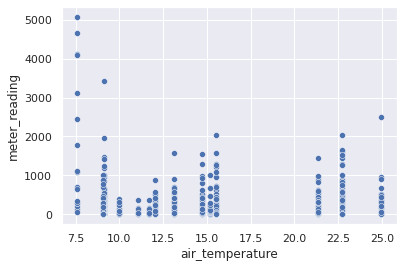

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='meter_reading')

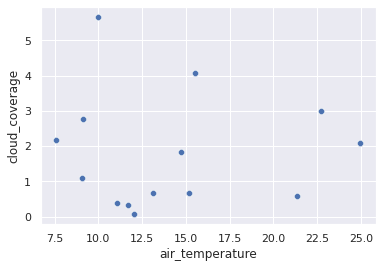

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='cloud_coverage')

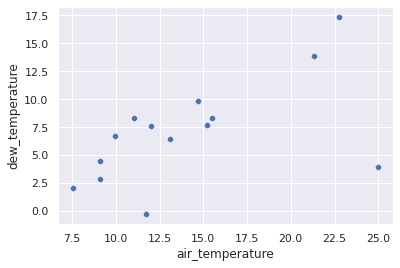

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='dew_temperature')

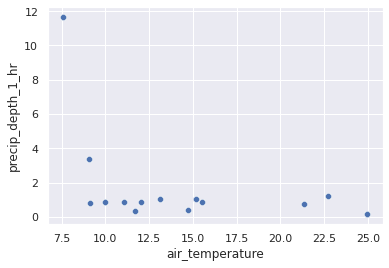

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='precip_depth_1_hr')

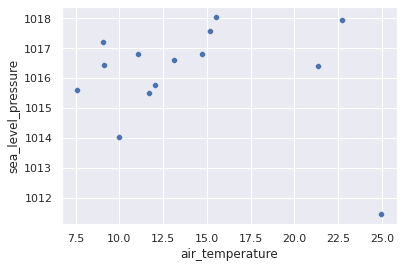

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='sea_level_pressure')

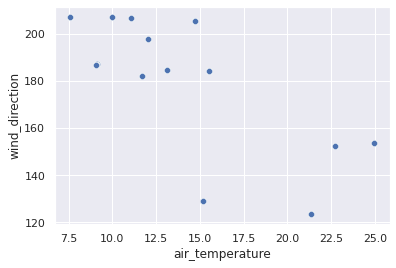

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='wind_direction')

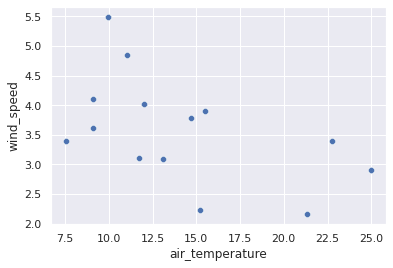

In [ ]:
sns.scatterplot(data=df4, x='air_temperature', y='wind_speed')

Terlihat pada 6 grafik diatas, dengan Y yang berubah-ubah dan X nya tetap yaitu air_temprature, didapati bahwa titik-titik yang ada berjumlah tetap, yaitu 10 titik. Seharusnya, titik yang ada adalah  +- 1000 titiknya , yang mana hal tersebut mengindikasikan bahwa data titik lebih > 10. Dengan melihat hanya terdapat 13 titik, menandakan bahwa data tersebut berkelompok sesuai dengan nilai dari air_tempraturenya. 
Dengan terdapat 13 kelompok yang sesuai dengan nilai air_temprature maka,  variabel yang lainnya, yaitu cloud_coverage,dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed akan sama nilainya  sesuai dengan air_tempraturenya.

# **Pemodelan Regresi**

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1413 non-null   float64 
 1   primary_use         1413 non-null   category
 2   square_feet         1413 non-null   int64   
 3   air_temperature     1413 non-null   float64 
 4   cloud_coverage      1413 non-null   float64 
 5   dew_temperature     1413 non-null   float64 
 6   precip_depth_1_hr   1413 non-null   float64 
 7   sea_level_pressure  1413 non-null   float64 
 8   wind_direction      1413 non-null   float64 
 9   wind_speed          1413 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 101.5 KB


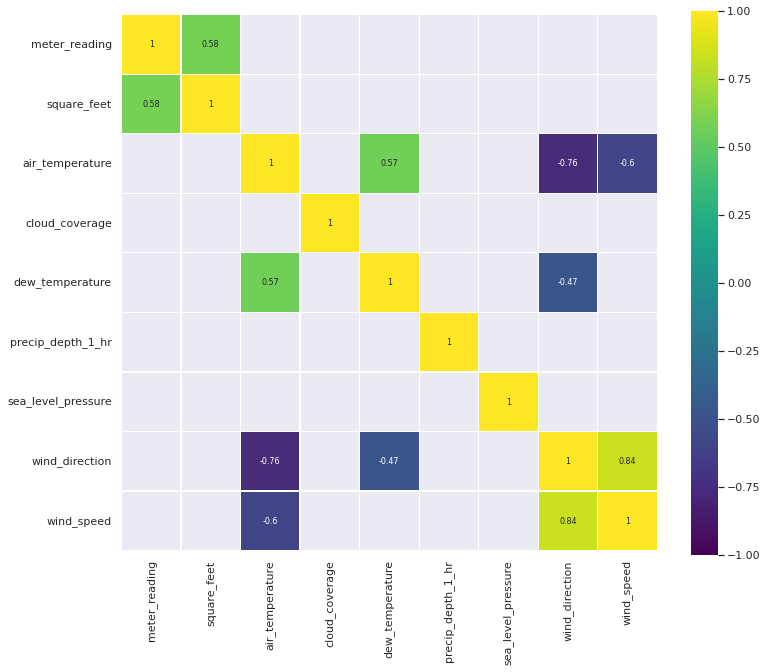

In [ ]:
#HeatMap untuk menyelidiki korelasi
corr2 = df4.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True);

Interpretasi heatmap:

- Nilai korelasi antar meter_reading (Y) dan square feet (variabel independen) menunjukan bahwa ada korelasi linier positif yang cukup kuat anatara meter reading dan square feet, ada kecenderungan bahwa nilai luas yang tinggi berkaitan dengan penggunaan listrik yang lebih tinggi dibandingkan luas square feet yang rendah

- Dari heatmap kita dapat melihat juga korelasi antar variabel independen (multikolinearitas) dapat dilihat bahwa variabel **wind_speed** berkorelasi cukup tinggi dengan air_temperature dan wind_direction, selain itu variabel **air temperature** berkorelasi cukup tinggi dengan wind_speed, wind_direction, dan dew_temperature. Artinya, terdapat multikolinearitas pada variabel tersebut.

Karena itu, kita dapat menghilangkan variabel wind_speed dan air_temperature dalam pemodelan regresi untuk menghindari permasalahan multikolinearitas.

In [ ]:
# Fitting model Regresi Sederhana
lm = smf.ols("meter_reading ~ C(primary_use)+ square_feet + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction ", data=df4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     63.54
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          7.67e-186
Time:                        09:09:30   Log-Likelihood:                -9903.7
No. Observations:                1413   AIC:                         1.985e+04
Df Residuals:                    1391   BIC:                         1.997e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                        1.796e+04   5202.613      3.451      0.001    7750.428    2.82e+04
C(primary_use)[T.Entertainment/public assembly]   -83.0677     23.507     -3.534      0.000    -129.180     -36.955
C(primary_use)[T.Food sales and service]           28.2938    121.613      0.233      0.816    -210.270     266.858
C(primary_use)[T.Healthcare]                       35.6287     60.347      0.590      0.555     -82.752     154.009
C(primary_use)[T.Lodging/residential]            -100.9710     25.716     -3.926      0.000    -151.417     -50.525
C(primary_use)[T.Manufacturing/industrial]        -27.2496     86.523     -0.315      0.753    -196.979     142.479
C(primary_use)[T.Office]                          -29.8379     20.464     -1.458      0.145     -69.981      10.305
C(primary_use)[T.Other]                           -41.9759     55.907     -0.751      0.453    -151.647      67.695
C(primary_use)[T.Parking]                        -517.0277     60.191     -8.590      0.000    -635.102    -398.954
C(primary_use)[T.Public services]                 -85.3973     25.909     -3.296      0.001    -136.221     -34.573
C(primary_use)[T.Religious worship]               -93.2453    156.516     -0.596      0.551    -400.279     213.788
C(primary_use)[T.Retail]                           12.8781     83.190      0.155      0.877    -150.314     176.070
C(primary_use)[T.Services]                       -343.5615     91.487     -3.755      0.000    -523.029    -164.095
C(primary_use)[T.Technology/science]              -33.5041    110.973     -0.302      0.763    -251.198     184.189
C(primary_use)[T.Utility]                           7.9370    135.638      0.059      0.953    -258.140     274.014
C(primary_use)[T.Warehouse/storage]               -79.9896     79.243     -1.009      0.313    -235.439      75.460
square_feet                                         0.0019   6.88e-05     28.075      0.000       0.002       0.002
cloud_coverage                                     20.3200      5.342      3.804      0.000       9.840      30.800
dew_temperature                                    10.8857      2.312      4.708      0.000       6.350      15.422
precip_depth_1_hr                                  90.2895      5.577     16.190      0.000      79.349     101.230
sea_level_pressure                                -17.9156      5.161     -3.471      0.001     -28.040      -7.791
wind_direction                                      0.4068      0.385      1.057      0.291      -0.348       1.162
==============================================================================
Omnibus:                     1490.148   Durbin-Watson:                   1.880
Prob(Omnibus):           

Intepretasi koefisien 

Dari model didapatkan hasil bahwa
• Keseluruhan variabel memiliki nilai p-value < 0.05 sehingga data signifikan secara statistik.

• Berdasarkan nilai  𝑅^2 , didapatkan 0,490 maka dapat dikatakan bahwa model hanya menjelaskan 4,9% variansi dari data, sehingga model ini tidak terlalu bagus dan akurat untuk digunakan.

Coef menunjukkan seberapa banyak kenaikan 1 unit pada variabel bebas terhadap variabel terikat. Sehingga,

•Setiap kenaikan 1 unit square feet akan meningkatkan 0.0019 meter reading, 

•Setiap kenaikan 1 unit cloud coverage akan menaikkan 20.3200 meter reading, 

•Setiap kenaikan 1 unit dew temperature akan menaikkan 10.8857 meter reading,

•Setiap kenaikan  1 unit sea level pressure akan menurunkan 17.9156 meter reading. 

•Setiap kenaikan  1 unit wind direction akan menaikkan 0.4068 meter reading. 

•Setiap kenaikan 1 unit precipt 1 hr akan menaikkan 90.2895



In [ ]:
set(df4['primary_use'])

{'Education',
 'Entertainment/public assembly',
 'Food sales and service',
 'Healthcare',
 'Lodging/residential',
 'Manufacturing/industrial',
 'Office',
 'Other',
 'Parking',
 'Public services',
 'Religious worship',
 'Retail',
 'Services',
 'Technology/science',
 'Utility',
 'Warehouse/storage'}

Interpretasi regresi:
- dengan variabel kategori dari primary_use, regresi menggunakan baseline kategori education.
- P val dari F untuk menyatakan signifikan keseluruhan variabel dengan p-val mendekati 0 artinya, model berguna.
- Variabel-variabel masing-masing yang signifikan dapat dilihat dari pval t, didapatkan variabel kategori entertainment terhadap edukasi, lodging terhadap edukasi, parking terhadap edukasi, public service terhadap edukasi, services terhadap edukasi, square feet hingga sea_level signifikan.
- R^2 0.49 dan R^2 adjusted 0.48 tidak memiliki perbedaan yang jauh, artinya variabel-variabel penjelas berguna.

##STEPWISE FORWARD

In [ ]:
def forward_selected(df4, response):
    remaining = set(df4.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            score = smf.ols(formula, df4).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, df4).fit()
    return model

In [ ]:
model = forward_selected(df4, 'meter_reading')

In [ ]:
print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + precip_depth_1_hr + primary_use + air_temperature + wind_direction + cloud_coverage + dew_temperature + wind_speed + 1
0.4861701561255959


In [ ]:
#Interpretasi Koefisien
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     61.73
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.32e-187
Time:                        09:09:31   Log-Likelihood:                -9897.3
No. Observations:                1413   AIC:                         1.984e+04
Df Residuals:                    1390   BIC:                         1.996e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

#Pemodelan tanpa Kategori

Misalkan, kita hanya ingin melihat hubungan dari variabel-variabel numerik, maka pemodelan didapatkan dengan:


In [ ]:
## getting column names
x_columns = ['square_feet','cloud_coverage','dew_temperature','precip_depth_1_hr','sea_level_pressure','wind_direction']
y = df4['meter_reading']
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df4[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:          meter_reading   R-squared (uncentered):                   0.553
Model:                            OLS   Adj. R-squared (uncentered):              0.552
Method:                 Least Squares   F-statistic:                              290.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):                   3.54e-242
Time:                        09:32:06   Log-Likelihood:                         -9963.8
No. Observations:                1413   AIC:                                  1.994e+04
Df Residuals:                    1407   BIC:                                  1.997e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

- Didapatkan nilai R^2 dan adjusted R^2 yang lebih tinggi, artinya informasi mengenai square feet, air temperature, cloud coverage, hingga wind speed dapat menjelaskan variabel Y lebih baik.

- Selain model berguna secara statistik (dilihat dari nilai p value f mendekati 0) masing-masing variabel juga berguna (Signifikan secara statistik) terhadap variabel Y, kecuali variabel wind_direction yang tidak signifikan secara statistik



#Kesimpulan dan Saran :
- Secara garis besar data yang diberikan, masih kurang baik karena masih terdapat banyak missing values.

- Terdapat koefisien positif untuk variabel square feet, cloud coverage, dew temperature, precipt depth 1 hr, dan wind direction yang mempengaruhi kenaikan listrik. Sementara, terdapat koefisien negatif untuk variabel sea level pressure yang mempengaruhi penurunan listrik.

- Terdapat outlier pada data, tetapi telah diatasi dengan melakukan scalling

- Untuk melihat meter_reading sebagai variabel dependen, dihapuskan 2 variabel dari yang diberikan yaitu variabel year_built dan floor_counts karena terlalu banyak missing values yang didapatkan

- Jika sebuah instansi edukasi, kesehatan, dan retail ingin membuat sebuah bangunan maka perlu dipersiapkan dana yang cukup besar karena penggunaan listrik dari ke-3 sektor tersebut cukup tinggi diantara sektor lainnya.

- Jika sebuah konstruksi ingin membuat sebuah bangunan yang memiliki luas bangunan yang cukup besar, maka perlu dipersiapkan daya listrik yang cukup besar pula, karena terdapat korelasi yang positif dan cukup besar antara keduanya.

- Dari sejumlah model regresi yang dicoba, didapatkan model reg